<font size = "12"> **MEASO space paper** </font>

# Loading relevant libraries

In [1]:
%matplotlib inline
import xarray as xr
import pandas as pd
import numpy as np
# import netCDF4 as nc
import matplotlib.pyplot as plt
from dask.distributed import Client, progress
import geopandas
import UsefulFunctions as uf
from clef.code import *
import os
# import re
import cmocean as cm

# Setting up paralellisation prior to analysis

In [18]:
client = Client(n_workers = 12)

# Using clef to check what data is available in ACCESS-ESM 1.5
Currently using conservative water temperature in historical experiment as an example 

In [19]:
#Creating a session and connecting to database
db = connect()
s = Session()

Refer to https://github.com/coecms/clef/tree/master/clef/data for information on what variables are accepted by database query function.

In [20]:
constraints = {'variable_id': 'bigthetao', 'model': 'ACCESS-ESM1-5', 'frequency': 'mon', 'experiment_id':'historical'}
df = search(s, project = 'CMIP6', latest = True, **constraints)
df

,project,activity_id,institution_id,source_id,source_type,experiment_id,sub_experiment_id,frequency,realm,variant_label,...,nominal_resolution,table_id,version,variable,path,filename,periods,fdate,tdate,time_complete
path,,,,,,,,,,,,,,,,,,,,,
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Omon/bigthetao/gn/v20191115,CMIP6,CMIP,CSIRO,ACCESS-ESM1-5,AOGCM,historical,none,mon,ocean,r1i1p1f1,...,250 km,Omon,v20191115,bigthetao,/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...,{bigthetao_Omon_ACCESS-ESM1-5_historical_r1i1p...,"[(18900101, 18991231), (19300101, 19391231), (...",18500101,20141231,True
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r2i1p1f1/Omon/bigthetao/gn/v20191128,CMIP6,CMIP,CSIRO,ACCESS-ESM1-5,AOGCM,historical,none,mon,ocean,r2i1p1f1,...,250 km,Omon,v20191128,bigthetao,/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...,{bigthetao_Omon_ACCESS-ESM1-5_historical_r2i1p...,"[(18900101, 18991231), (19300101, 19391231), (...",18500101,20141231,True
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r3i1p1f1/Omon/bigthetao/gn/v20191203,CMIP6,CMIP,CSIRO,ACCESS-ESM1-5,AOGCM,historical,none,mon,ocean,r3i1p1f1,...,250 km,Omon,v20191203,bigthetao,/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...,{bigthetao_Omon_ACCESS-ESM1-5_historical_r3i1p...,"[(18900101, 18991231), (19300101, 19391231), (...",18500101,20141231,True
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r9i1p1f1/Omon/bigthetao/gn/v20200529,CMIP6,CMIP,CSIRO,ACCESS-ESM1-5,AOGCM,historical,none,mon,ocean,r9i1p1f1,...,250 km,Omon,v20200529,bigthetao,/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...,{bigthetao_Omon_ACCESS-ESM1-5_historical_r9i1p...,"[(18900101, 18991231), (19300101, 19391231), (...",18500101,20141231,True
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r7i1p1f1/Omon/bigthetao/gn/v20200529,CMIP6,CMIP,CSIRO,ACCESS-ESM1-5,AOGCM,historical,none,mon,ocean,r7i1p1f1,...,250 km,Omon,v20200529,bigthetao,/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...,{bigthetao_Omon_ACCESS-ESM1-5_historical_r7i1p...,"[(18900101, 18991231), (19300101, 19391231), (...",18500101,20141231,True
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r6i1p1f1/Omon/bigthetao/gn/v20200529,CMIP6,CMIP,CSIRO,ACCESS-ESM1-5,AOGCM,historical,none,mon,ocean,r6i1p1f1,...,250 km,Omon,v20200529,bigthetao,/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...,{bigthetao_Omon_ACCESS-ESM1-5_historical_r6i1p...,"[(18900101, 18991231), (19300101, 19391231), (...",18500101,20141231,True
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r4i1p1f1/Omon/bigthetao/gn/v20200529,CMIP6,CMIP,CSIRO,ACCESS-ESM1-5,AOGCM,historical,none,mon,ocean,r4i1p1f1,...,250 km,Omon,v20200529,bigthetao,/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...,{bigthetao_Omon_ACCESS-ESM1-5_historical_r4i1p...,"[(18900101, 18991231), (19300101, 19391231), (...",18500101,20141231,True
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r8i1p1f1/Omon/bigthetao/gn/v20200529,CMIP6,CMIP,CSIRO,ACCESS-ESM1-5,AOGCM,historical,none,mon,ocean,r8i1p1f1,...,250 km,Omon,v20200529,bigthetao,/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...,{bigthetao_Omon_ACCESS-ESM1-5_historical_r8i1p...,"[(18900101, 18991231), (19300101, 19391231), (...",18500101,20141231,True
/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r5i1p1f1/Omon/bigthetao/gn/v20200601,CMIP6,CMIP,CSIRO,ACCESS-ESM1-5,AOGCM,historical,none,mon,ocean,r5i1p1f1,...,250 km,Omon,v20200601,bigthetao,/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACC...,{bigthetao_Omon_ACCESS-ESM1-5_historical_r5i1p...,"[(18900101, 18991231), (19300101, 19391231), (...",18500101,20141231,True


In [5]:
constraints = {'variable_id': 'areacello', 'model': 'ACCESS-ESM1-5', 'experiment_id':'historical', 'variant_label':'r1i1p1f1'}
df2 = search(s, project = 'CMIP6', latest = True, **constraints)
# df2

In [6]:
constraints = {'variable_id': 'thkcello', 'model': 'ACCESS-ESM1-5', 'experiment_id':'historical', 'variant_label':'r1i1p1f1'}
df3 = search(s, project = 'CMIP6', latest = True, **constraints)
# df3

In [7]:
constraints = {'variable_id': 'volcello', 'model': 'ACCESS-ESM1-5', 'experiment_id':'historical', 'variant_label':'r1i1p1f1'}
df4 = search(s, project = 'CMIP6', latest = True, **constraints)
# df4

In [7]:
#Checking column names
df.columns

Index(['project', 'activity_id', 'institution_id', 'source_id', 'source_type',
       'experiment_id', 'sub_experiment_id', 'frequency', 'realm',
       'variant_label', 'member_id', 'variable_id', 'grid_label',
       'nominal_resolution', 'table_id', 'version', 'variable', 'path',
       'filename', 'periods', 'fdate', 'tdate', 'time_complete'],
      dtype='object')

## Creating filepaths for the files we are interested in
Currently choosing the first option in the query data frame

In [9]:
path = df['path'][0]
filename = sorted([f[0] for f in zip(df['filename'][0])])
filepath = [os.path.join(path, f) for f in filename]
# filepath

## Checking data prior to further processing
Currently choosing the decade between 2000 and 2010

In [8]:
sst = nc.Dataset(filepath[-2])
print(sst)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.7 CMIP-6.2
    activity_id: CMIP
    branch_method: standard
    branch_time_in_child: 0.0
    branch_time_in_parent: 21915.0
    creation_date: 2019-11-15T15:50:53Z
    data_specs_version: 01.00.30
    experiment: all-forcing simulation of the recent past
    experiment_id: historical
    external_variables: areacello volcello
    forcing_index: 1
    frequency: mon
    further_info_url: https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCESS-ESM1-5.historical.none.r1i1p1f1
    grid: native atmosphere N96 grid (145x192 latxlon)
    grid_label: gn
    history: 2019-11-15T15:50:53Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.
    initialization_index: 1
    institution: Commonwealth Scientific and Industrial Research Organisation, Aspendale, Victoria 3195, Australia
    institution_id: CSIRO
    mip_era: CMIP6
    nominal_resolution: 250 km


In [9]:
print(sst.__dict__)

{'Conventions': 'CF-1.7 CMIP-6.2', 'activity_id': 'CMIP', 'branch_method': 'standard', 'branch_time_in_child': 0.0, 'branch_time_in_parent': 21915.0, 'creation_date': '2019-11-15T15:50:53Z', 'data_specs_version': '01.00.30', 'experiment': 'all-forcing simulation of the recent past', 'experiment_id': 'historical', 'external_variables': 'areacello volcello', 'forcing_index': 1, 'frequency': 'mon', 'further_info_url': 'https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCESS-ESM1-5.historical.none.r1i1p1f1', 'grid': 'native atmosphere N96 grid (145x192 latxlon)', 'grid_label': 'gn', 'history': '2019-11-15T15:50:53Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.', 'initialization_index': 1, 'institution': 'Commonwealth Scientific and Industrial Research Organisation, Aspendale, Victoria 3195, Australia', 'institution_id': 'CSIRO', 'mip_era': 'CMIP6', 'nominal_resolution': '250 km', 'notes': "Exp: ESM-historical; Local ID: HI-05; Variable: bigthetao (['temp'])",

In [10]:
[print(dim) for dim in sst.dimensions.values()]

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 120
<class 'netCDF4._netCDF4.Dimension'>: name = 'lev', size = 50
<class 'netCDF4._netCDF4.Dimension'>: name = 'j', size = 300
<class 'netCDF4._netCDF4.Dimension'>: name = 'i', size = 360
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'vertices', size = 4


[None, None, None, None, None, None]

In [11]:
[print(var) for var in sst.variables.values()]

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-01-01
    calendar: proleptic_gregorian
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (120,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (120, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lev(lev)
    bounds: lev_bnds
    units: m
    axis: Z
    positive: down
    long_name: ocean depth coordinate
    standard_name: depth
unlimited dimensions: 
current shape = (50,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 lev_bnds(lev, bnds)
unlimited dimensions: 
current shape = (50, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 j(j)
    

[None, None, None, None, None, None, None, None, None, None, None]

## Loading ocean temperature data
Choosing one decade only, which include the years between 2000 and 2009. Default missing values changed to NAs in the data array. Select upper 200 m of the water column.

In [10]:
sst = xr.open_dataset(filepath[-2], mask_and_scale = True)

#Select only data that is in the upper 200 m - Using lower bound of the depth bins
sst = sst.bigthetao[:,sst.lev_bnds[:,1] <= 200]

### Correcting latitude and longitude dimensions

In [11]:
sst = uf.corrlong(sst)
sst

<xarray.DataArray 'bigthetao' (time: 120, lev: 20, latitude: 300, longitude: 360)>
[259200000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lev        (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
  * latitude   (latitude) float64 -77.88 -77.63 -77.38 ... 65.21 65.21 65.21
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:   sea_water_conservative_temperature
    long_name:       Sea Water Conservative Temperature
    comment:         Sea water conservative temperature (this should be contr...
    units:           degC
    original_units:  K
    history:         2019-11-15T15:50:50Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello volume: volcello

### Selecting data for the Southern Ocean
Calculating mean water temperature per month within the SO (30S to 90S).

In [12]:
sst_upper200_SO = sst.sel(latitude = slice(-90, -30))
sst_upper200_SO

<xarray.DataArray 'bigthetao' (time: 120, lev: 20, latitude: 77, longitude: 360)>
[66528000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
  * lev        (lev) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
  * latitude   (latitude) float64 -77.88 -77.63 -77.38 ... -32.5 -31.5 -30.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:   sea_water_conservative_temperature
    long_name:       Sea Water Conservative Temperature
    comment:         Sea water conservative temperature (this should be contr...
    units:           degC
    original_units:  K
    history:         2019-11-15T15:50:50Z altered by CMOR: Converted units fr...
    cell_methods:    area: mean where sea time: mean
    cell_measures:   area: areacello volume: volcello

## Getting horizontal area of grid

In [13]:
filename = [f[0] for f in zip(df2['filename'][0])]
filepath = os.path.join(df2['path'][0], filename[0])

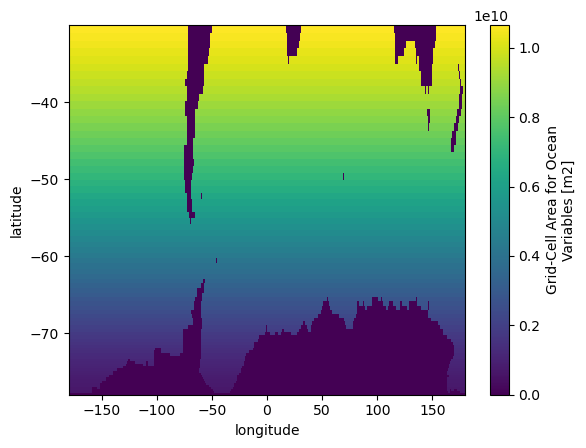

In [14]:
area = xr.open_dataarray(filepath, mask_and_scale = True, drop_variables = ("vertices_latitude", "vertices_longitude"))
#Correcting longitude prior to extracting Southern Ocean
area = uf.corrlong(area)
#Extracting Southern Ocean
area = area.sel(latitude = slice(-90, -30))
#Checking data
area.plot()

## Getting thickness (vertical extent) of grid cells

In [15]:
filename = [f[0] for f in zip(df3['filename'][0])]
filepath = os.path.join(df3['path'][0], filename[0])

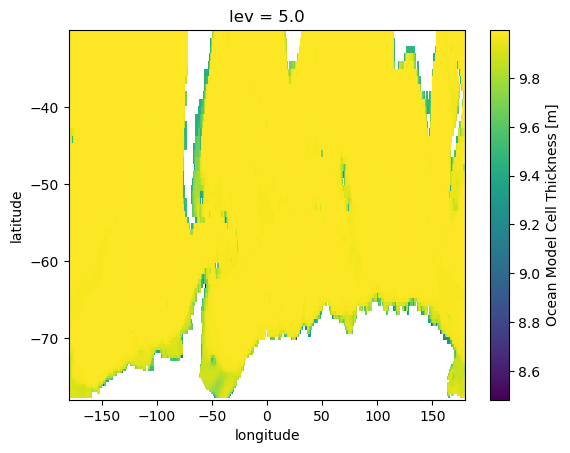

In [16]:
height = xr.open_dataset(filepath, mask_and_scale = True)
#Correcting longitude prior to extracting Southern Ocean
height = uf.corrlong(height)
#Extracting Southern Ocean
height = height.sel(latitude = slice(-90, -30))
#Select only data that is in the upper 200 m - Using lower bound of the depth bins
height = height.thkcello[height.lev_bnds[:,1] <= 200]
#Checking data
height[0].plot()

## Getting volume of grid cells

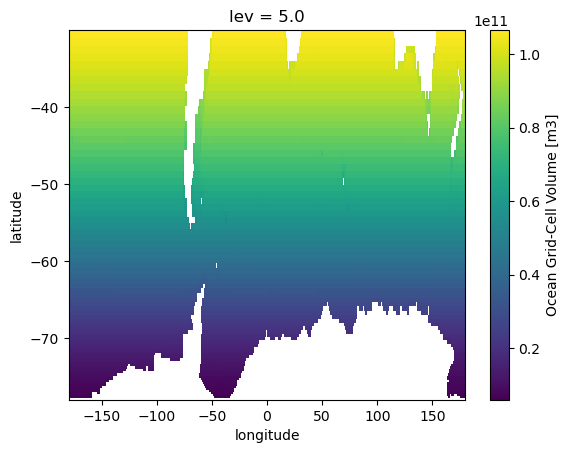

In [17]:
filename = [f[0] for f in zip(df4['filename'][0])]
filepath = os.path.join(df4['path'][0], filename[0])
vol = xr.open_dataset(filepath, mask_and_scale = True)
#Correcting longitude prior to extracting Southern Ocean
vol = uf.corrlong(vol)
# #Extracting Southern Ocean
vol = vol.sel(latitude = slice(-90, -30))
#Select only data that is in the upper 200 m - Using lower bound of the depth bins
vol = vol.volcello[vol.lev_bnds[:,1] <= 200]
#Checking data
vol[0].plot()

# Loading MEASO regions mask
The mask for the MEASO regions was created based on a shapefile sent by A. Constable on 2021-06-24. A detailed workflow of how the mask was created can be found in `0_CreatingMeasoMask.ipynb`.

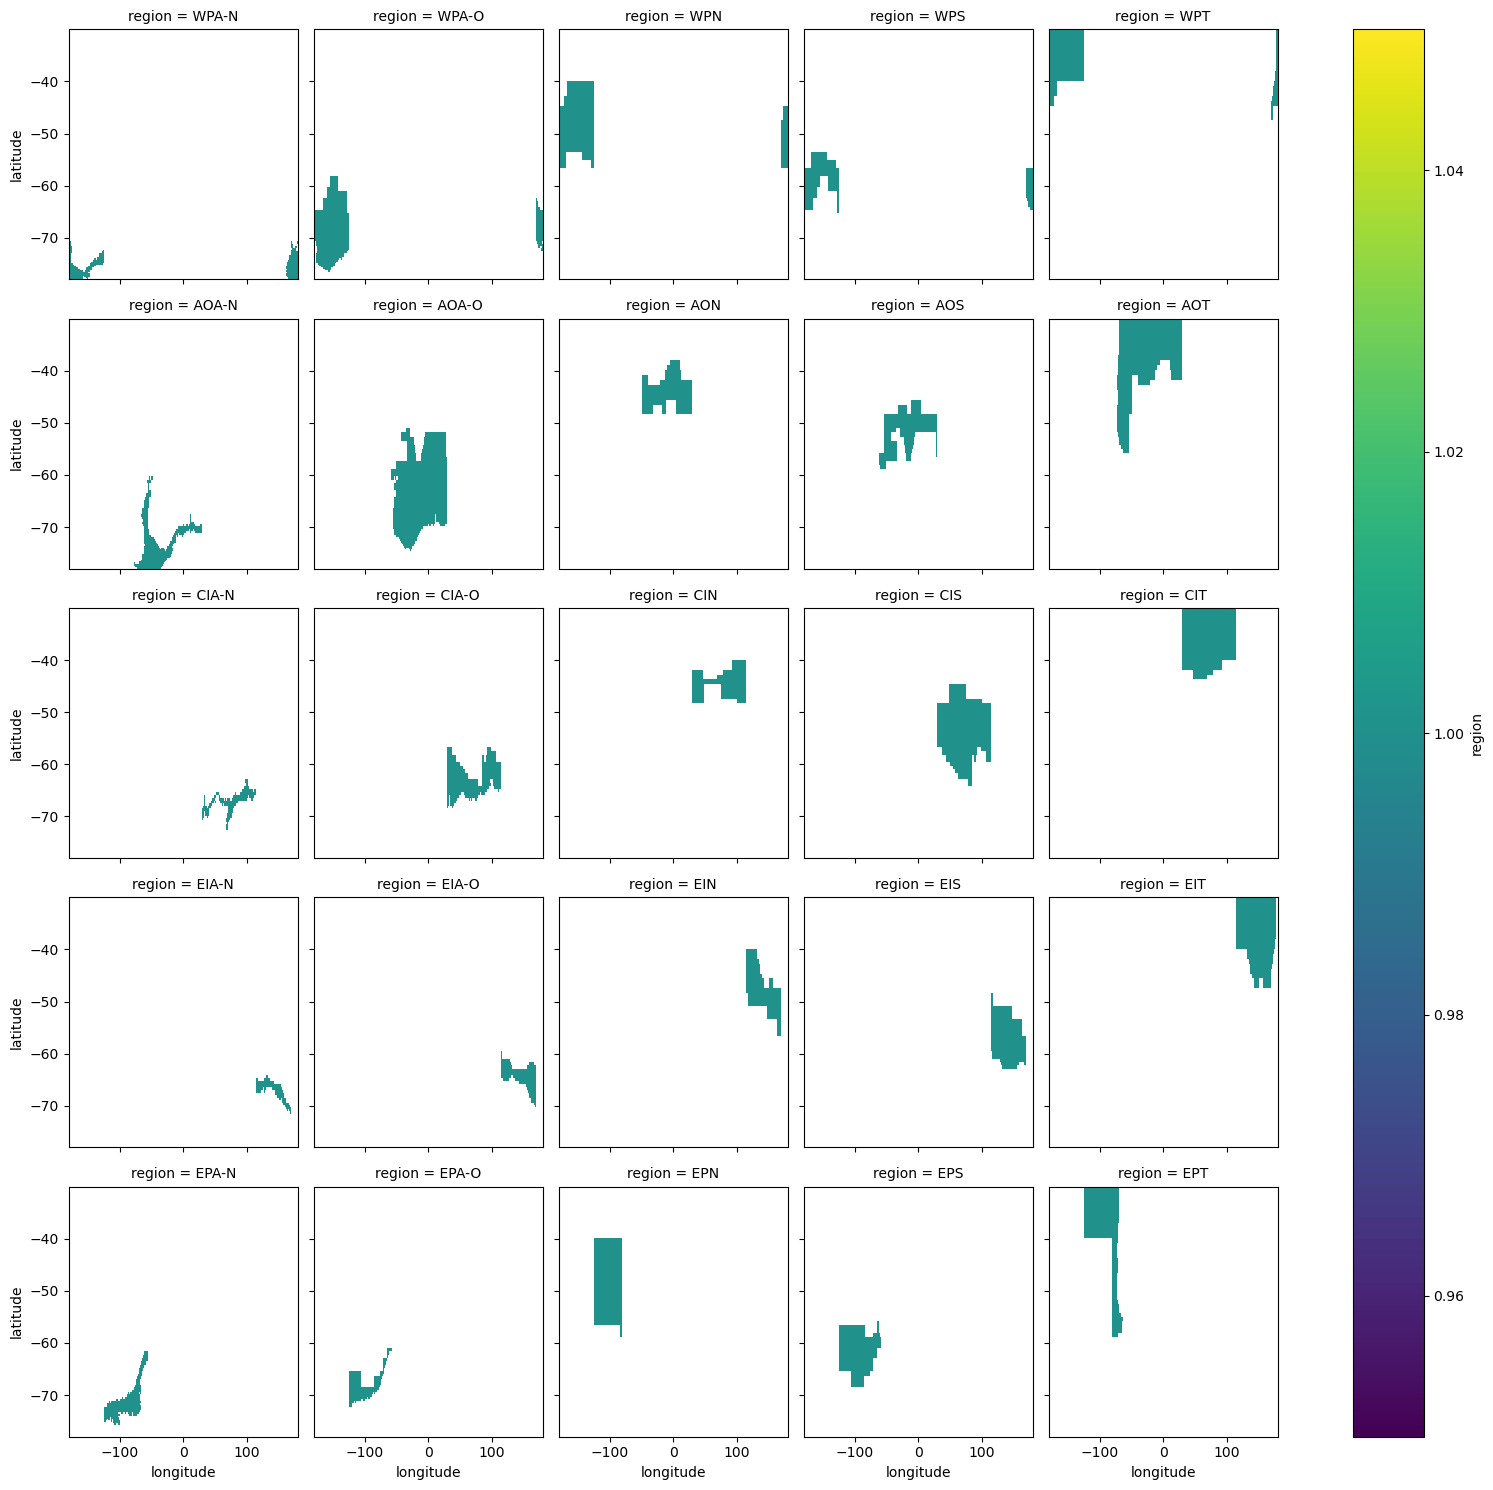

In [55]:
#Loading mask
regions = xr.load_dataarray('MEASO_3Dmask.nc')

#Plotting mask
regions.plot(col = 'region', col_wrap = 5)

# Extracting data for each MEASO area

In [56]:
#Getting region names from mask
regionNames = sorted(set(regions.region.values))

#Subsetting shapefiles into regions - Initialise dictionary that will contain sector limits
MEASOregions = {}

#Saving each sector as an entry in the dictionary
for i in regionNames:
    MEASOregions[f"{i}"] = regions.sel(region = i)
    
MEASOregions.keys()

dict_keys(['AOA-N', 'AOA-O', 'AON', 'AOS', 'AOT', 'CIA-N', 'CIA-O', 'CIN', 'CIS', 'CIT', 'EIA-N', 'EIA-O', 'EIN', 'EIS', 'EIT', 'EPA-N', 'EPA-O', 'EPN', 'EPS', 'EPT', 'WPA-N', 'WPA-O', 'WPN', 'WPS', 'WPT'])

In [114]:
#Subsetting shapefiles into sectors - Initialise dictionary that will contain sector limits
weighted_temp_2D = {}
weighted_temp_timeseries = {}

#Saving each sector as an entry in the dictionary
for i in regionNames:
    #Apply mask to temperature data and cell volume 
    sst_reg = sst_upper200_SO*MEASOregions[i]
    vol_reg = vol*MEASOregions[i]
    
    #Prepare volume data to be used as weights
    vol_reg.name = 'weights'
    #Replace NA values with zeroes
    vol_reg = vol_reg.fillna(0)
    
    #Calculating weighted means
    sst_weighted = sst_reg.weighted(vol_reg)
    #Saving weighted means per sector (lon, lat)
    weighted_temp_2D[f"{i}"] = sst_weighted.mean('lev')
    #Saving weighted means per time step ()
    weighted_temp_timeseries[f"{i}"] = sst_weighted.mean(('latitude', 'longitude', 'lev'))
    weighted_temp_2D[i].to_netcdf(os.path.join('Outputs', ('weightedMeans_temp_' + i + '_2000-2009.nc')))
    weighted_temp_timeseries[i].to_netcdf(os.path.join('Outputs', ('weightedMeans_TS_temp_' + i + '_2000-2009.nc')))

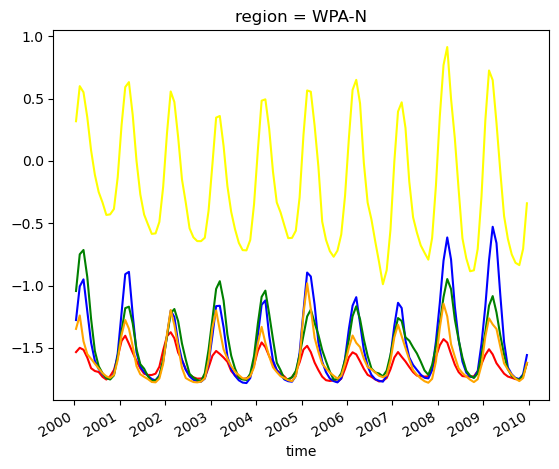

In [117]:
# weighted_temp_2D['AOA-N'][0].plot()
weighted_temp_timeseries['AOA-N'].plot(color = 'red')
weighted_temp_timeseries['CIA-N'].plot(color = 'blue')
weighted_temp_timeseries['EIA-N'].plot(color = 'green')
weighted_temp_timeseries['EPA-N'].plot(color = 'yellow')
weighted_temp_timeseries['WPA-N'].plot(color = 'orange')

In [17]:
WPAN

<xarray.DataArray (time: 120, latitude: 77, longitude: 360)>
[3326400 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-16T12:00:00 ... 2009-12-16T12:00:00
  * latitude   (latitude) float64 -77.88 -77.63 -77.38 ... -32.5 -31.5 -30.5
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    region     object ...

In [3]:
# xr.open_dataarray('YearlyMonthlyMeans_WPNregion_2000-2009.nc')
WPAN = xr.open_dataarray('Outputs/weightedMeans_temp_WPA-N_2000-2009.nc')
CIAN = xr.open_dataarray('Outputs/weightedMeans_temp_CIA-N_2000-2009.nc')
AOAN = xr.open_dataarray('Outputs/weightedMeans_temp_AOA-N_2000-2009.nc')
EIAN = xr.open_dataarray('Outputs/weightedMeans_temp_EIA-N_2000-2009.nc')
EPAN = xr.open_dataarray('Outputs/weightedMeans_temp_EPA-N_2000-2009.nc')

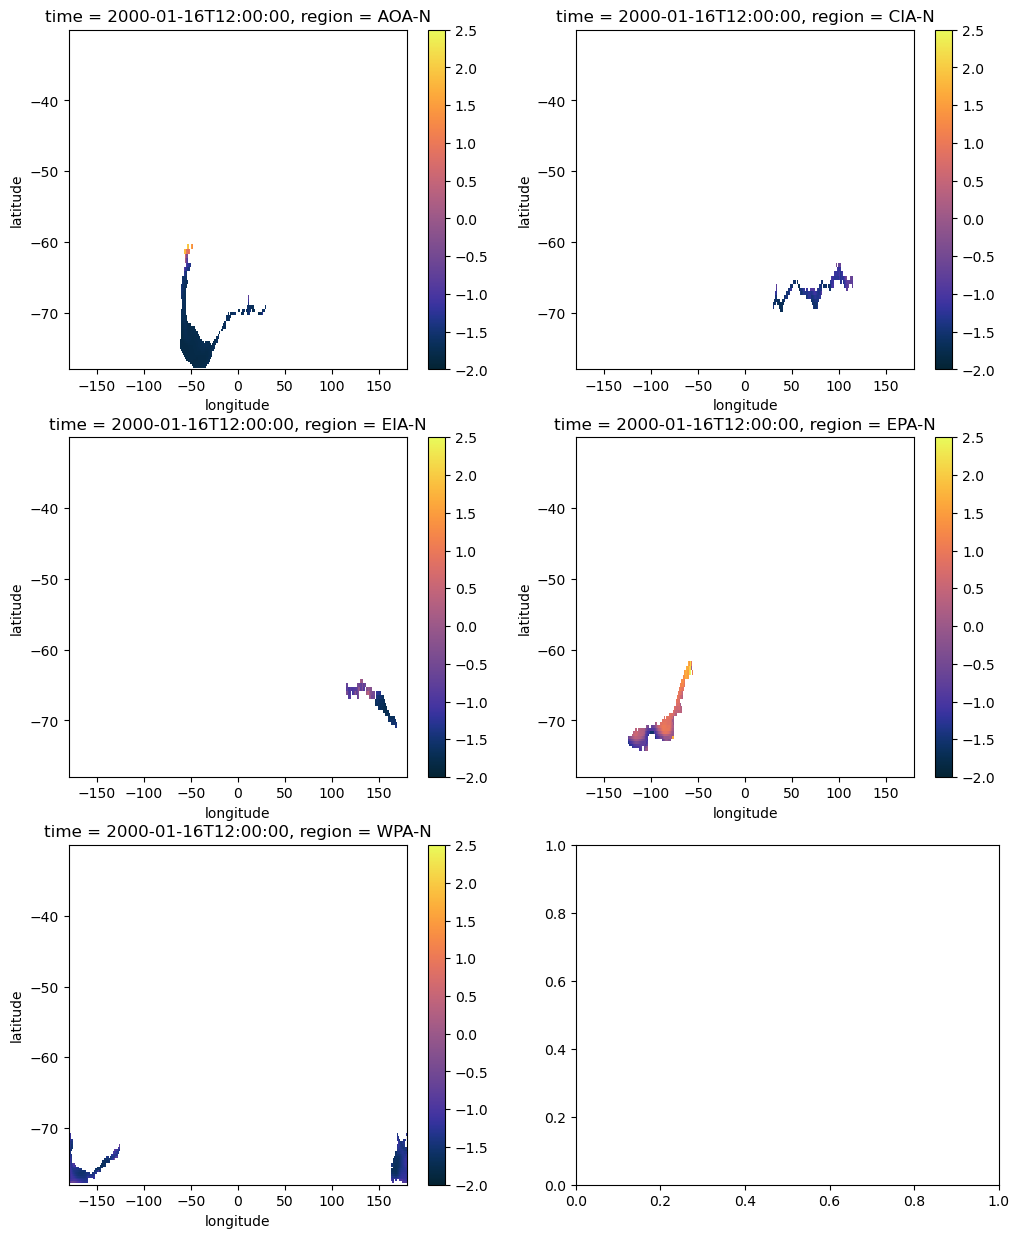

In [16]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize = (12, 15))
AOAN[0].plot(ax = ax1, vmin = -2, vmax = 2.5, cmap = cm.cm.thermal)
CIAN[0].plot(ax = ax2, vmin = -2, vmax = 2.5, cmap = cm.cm.thermal)
EIAN[0].plot(ax = ax3, vmin = -2, vmax = 2.5, cmap = cm.cm.thermal)
EPAN[0].plot(ax = ax4, vmin = -2, vmax = 2.5, cmap = cm.cm.thermal)
WPAN[0].plot(ax = ax5, vmin = -2, vmax = 2.5, cmap = cm.cm.thermal)

## Calculating weights prior to mean calculation

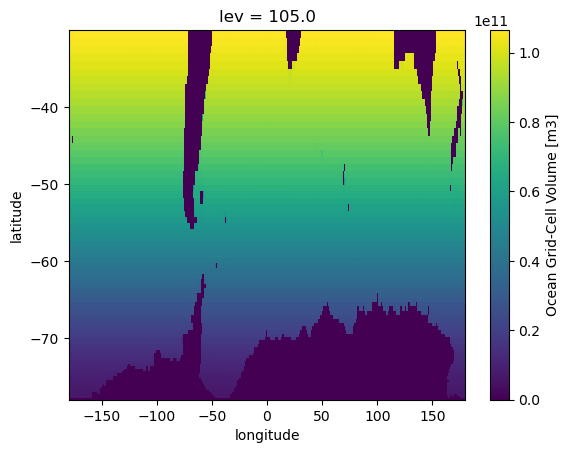

In [124]:
vol.name = 'weights'
vol = vol.fillna(0)
vol[10].plot()

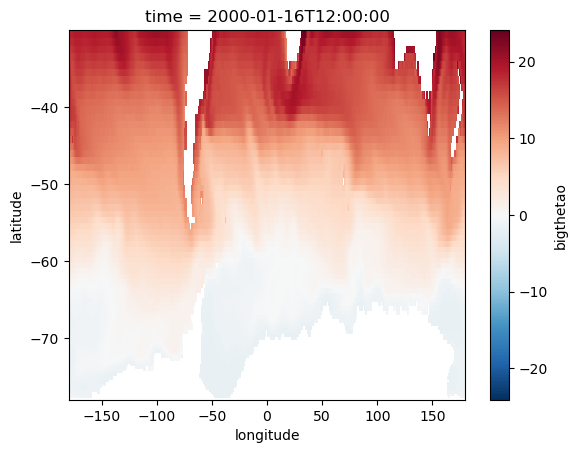

In [140]:
# sst_weighted = sst_upper200_SO[0].weighted(vol)
# sst_weighted

# weighted_mean = sst_weighted.mean('lev')
weighted_mean.plot()

In [150]:
(((sst_upper200_SO[0]*weights_vert_levels).sum('lev'))-weighted_mean)
# (sst_upper200_SO[0].mean('lev')-weighted_mean).plot()

<xarray.DataArray ()>
array(7.62939453e-06)
Coordinates:
    time     datetime64[ns] 2000-01-16T12:00:00

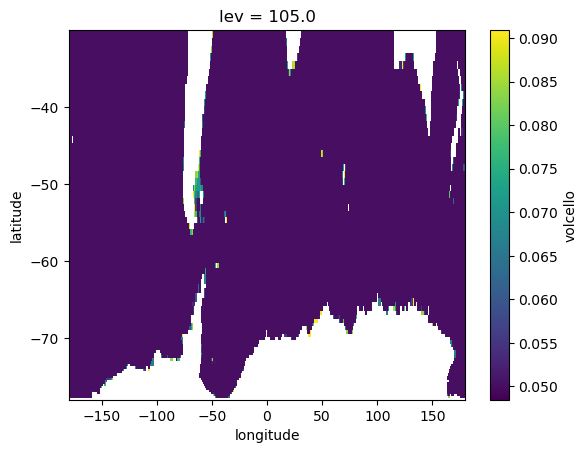

In [110]:
#Cell height
sum_vol = vol.sum('lev')
weights_vert_levels = vol/sum_vol

#Checking data
weights_vert_levels[10].plot()

sst_upper200mean_SO = (sst_upper200_SO*weights_vert_levels).sum('lev')